In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import importlib

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library

In [3]:
from performance_prediction import dnn_tools
from performance_prediction.dnn_tools import dnn

In [4]:
# Select the model and GPU whose performance should be predicted
model = 'VGG16'
gpu = 'P100'

In [5]:
# Set paths
prediction_model = 'all'
PREDICTION_PATH = os.path.join(ROOT_DIR, 'performance_prediction/models/%s/saved_model' %prediction_model)
SCALER_PATH = os.path.join(ROOT_DIR, 'performance_prediction/models/%s/scaler_Conv.save' %prediction_model)
MODEL_PATH = os.path.join(ROOT_DIR, 'performance_prediction/dnn_architecture/%s.json' %model)
GPU_PATH = os.path.join(ROOT_DIR, 'performance_prediction/GPUs/%s.json' %gpu)

In [6]:
VGG16 = dnn_tools.import_model(MODEL_PATH)

In [7]:
# Select optimizer ('None', 'SGD', 'Adam', ...)
opt = 'SGD'

In [8]:
batchsize = 2**np.arange(0,6,1)
t = np.zeros([16,6])
time = np.zeros(6)

for i in range(len(batchsize)):
    time[i], l, t[:,i] = VGG16.predict(GPU_PATH,
                                       optimizer = opt,
                                       batchsize = batchsize[i],
                                       model_file = PREDICTION_PATH,
                                       scaler_file = SCALER_PATH)

INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables


/Users/djustus/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/workspace/newcastle/ml-performance-prediction/performance_prediction/models/all/saved_model/variables/variables


In [9]:
l_unique = l.copy()
duplicates = [12,11,9,6]
for d in duplicates:
    print(l_unique[d])
    l_unique.pop(d)
    
t_unique = np.delete(t,duplicates,0)

conv5_3
conv5_2
conv4_3
conv3_3


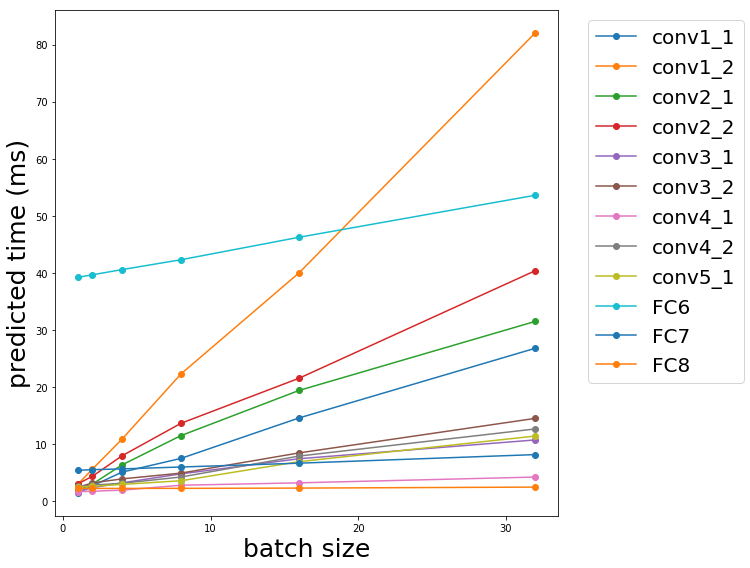

In [10]:
fig,ax = plt.subplots(1,1,figsize=[8,8])
plt.plot(batchsize,t_unique.transpose(),'o-')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.xlabel('batch size',fontsize=25)
plt.ylabel('predicted time (ms)',fontsize=25)

plt.legend(l_unique,bbox_to_anchor=(1.04,1), loc="upper left",fontsize=20)

plt.tight_layout()

plt.show()